In [2]:
import pandas as pd
import re
import numpy as np
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tqdm import tqdm

In [3]:
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
data=[]

[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import os
os.getcwd()

'C:\\Users\\Sai Priya\\Desktop\\project\\pythoncodes'

In [5]:
os.chdir("C:/Users/Sai Priya/Desktop/project/datasets")

In [6]:
ques = pd.read_csv("Questions.csv",encoding="ISO-8859-1")
ques.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
tags = pd.read_csv("Tags.csv",encoding='ISO-8859-1')
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


In [8]:
tags['Tag'] = tags['Tag'].astype(str)
grouped_tags = tags.groupby("Id")['Tag'].apply(lambda tags: ' '.join(tags))
grouped_tags.reset_index()


,Id,Tag
0,80,flex actionscript-3 air
1,90,svn tortoisesvn branch branching-and-merging
2,120,sql asp.net sitemap
3,180,algorithm language-agnostic colors color-space
4,260,c# .net scripting compiler-construction
...,...,...
1264211,40143210,php .htaccess
1264212,40143300,google-bigquery
1264213,40143340,android android-studio
1264214,40143360,javascript vue.js


In [9]:
grouped_tags.head()

Id
80                            flex actionscript-3 air
90       svn tortoisesvn branch branching-and-merging
120                               sql asp.net sitemap
180    algorithm language-agnostic colors color-space
260           c# .net scripting compiler-construction
Name: Tag, dtype: object

In [10]:
ques.drop(columns=['OwnerUserId', 'CreationDate', 'ClosedDate'], inplace=True)
ques = ques.merge(grouped_tags, on='Id')


In [11]:
ques.head()

,Id,Score,Title,Body,Tag
0,80,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,90,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,120,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,180,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,260,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [12]:
ques = ques[ques['Score']>5]

In [13]:
ques.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72950 entries, 0 to 1264205
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      72950 non-null  int64 
 1   Score   72950 non-null  int64 
 2   Title   72950 non-null  object
 3   Body    72950 non-null  object
 4   Tag     72950 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.3+ MB


In [14]:
ques.drop(columns = ['Id','Score'],inplace=True)
ques.head()

,Title,Body,Tag
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,flex actionscript-3 air
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,svn tortoisesvn branch branching-and-merging
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,sql asp.net sitemap
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,algorithm language-agnostic colors color-space
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,c# .net scripting compiler-construction


In [15]:
del tags
del grouped_tags


In [16]:
ques['Tag'] = ques['Tag'].apply(lambda x: x.split())
all_tags = [item for sublist in ques['Tag'].values for item in sublist]


In [17]:
len(all_tags)

224129

In [18]:
unique_tags = list(set(all_tags))

In [19]:
len(unique_tags)

14883

In [20]:
from collections import Counter
ques.head()

,Title,Body,Tag
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,"[flex, actionscript-3, air]"
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,"[svn, tortoisesvn, branch, branching-and-merging]"
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net, sitemap]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,"[algorithm, language-agnostic, colors, color-s..."
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net, scripting, compiler-construction]"


In [21]:
counter = Counter(all_tags)
most_occur = counter.most_common(100)


In [22]:
tags = [i[0] for i in most_occur]
count = [i[1] for i in most_occur]
tags[:5],count[:5]


(['c#', 'java', 'javascript', 'android', 'python'],
 [6907, 6862, 5560, 5052, 4442])

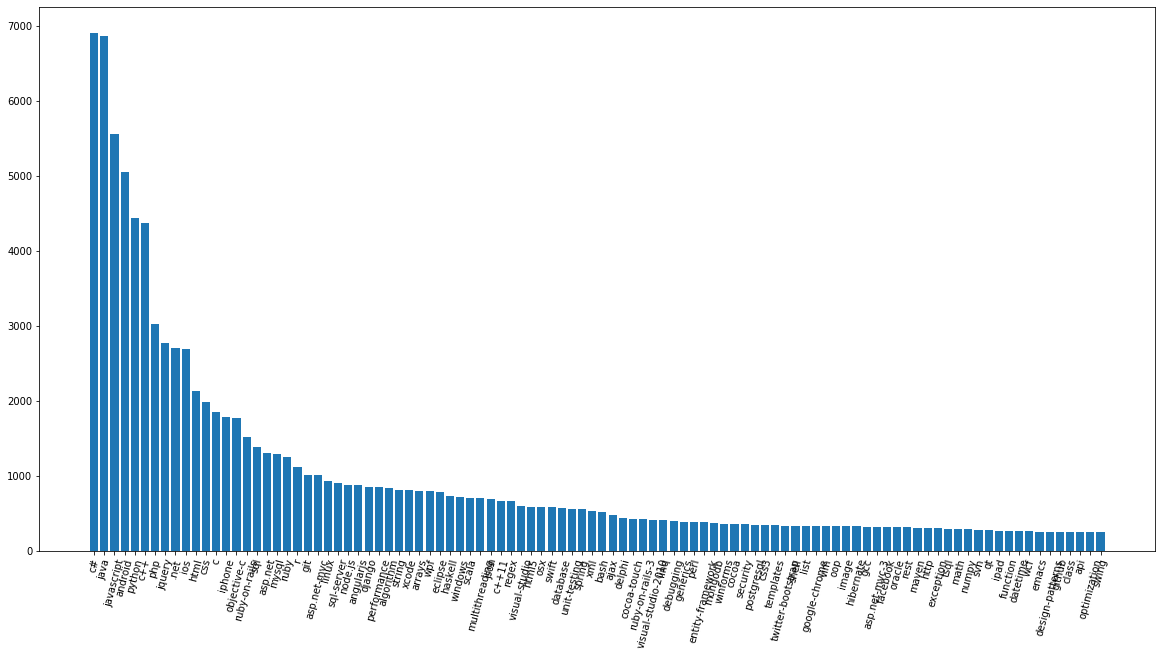

In [23]:
from matplotlib import pyplot as plt
x = np.arange(len(most_occur))
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, height= count) 
plt.xticks(x, tags, rotation=75)
plt.show()

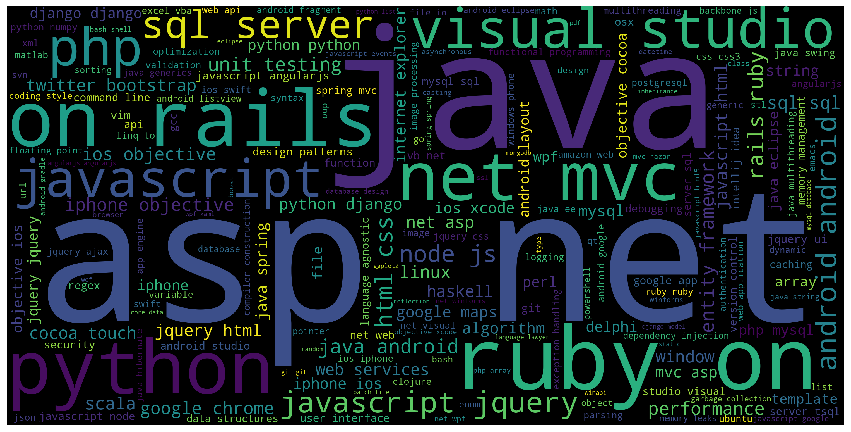

In [24]:
from wordcloud import WordCloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=3000,height = 1500).generate(text)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(" ".join(all_tags))


In [25]:
def most_common(x):
    tags_filtered = []
    for i in range(0, len(x)):
        if x[i] in tags:
            tags_filtered.append(x[i])
    return tags_filtered


In [26]:
ques['Tag'] = ques['Tag'].apply(lambda x: most_common(x))
ques['Tag'] = ques['Tag'].apply(lambda x: x if len(x)>0 else None)

In [27]:
ques.shape

(72950, 3)

In [28]:
ques.dropna(subset=['Tag'], inplace=True)
ques.shape

(63167, 3)

In [29]:
ques.head()

,Title,Body,Tag
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...,[svn]
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...,"[sql, asp.net]"
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...,[algorithm]
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...,"[c#, .net]"
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...,"[c++, oop, class]"


In [30]:
# Converting html to text in the body
ques['Body'] = ques['Body'].apply(lambda x: BeautifulSoup(x).get_text())


In [31]:
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to C:\Users\Sai
[nltk_data]    |     Priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to C:\Users\Sai
[nltk_data]    |     Priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to C:\Users\Sai
[nltk_data]    |     Priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to C:\Users\Sai
[nltk_data]    |     Priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to C:\Users\Sai
[nltk_data]    |     Priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_revie

True

In [32]:
token=ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

def clean_text(text):
  text = text.lower()
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "can not ", text)
  text = re.sub(r"n't", " not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub(r"\'\n", " ", text)
  text = re.sub(r"\'\xa0", " ", text)
  text = re.sub('\s+', ' ', text)
  text = text.strip(' ')
  return text

def strip_list_noempty(mylist):
  newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
  return [item for item in newlist if item != '']

def clean_punct(text): 
  words=token.tokenize(text)
  punctuation_filtered = []
  regex = re.compile('[%s]' % re.escape(punct))
  remove_punctuation = str.maketrans(' ', ' ', punct)
  for w in words:
      if w in tags:
          punctuation_filtered.append(w)
      else:
          punctuation_filtered.append(regex.sub('', w))

  filtered_list = strip_list_noempty(punctuation_filtered)

  return ' '.join(map(str, filtered_list))

lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text)
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))


In [33]:
def combine(new_df):
  new_df['Body'] = new_df['Body'].apply(lambda x: clean_text(x))
  print(1)
  new_df['Body'] = new_df['Body'].apply(lambda x: clean_punct(x))
  print(2)
  new_df['Body'] = new_df['Body'].apply(lambda x: lemitizeWords(x)) 
  print(3)
  new_df['Body'] = new_df['Body'].apply(lambda x: stopWordsRemove(x))
  print(4)
  new_df['Title'] = new_df['Title'].apply(lambda x: str(x))
  print(5)
  new_df['Title'] = new_df['Title'].apply(lambda x: clean_text(x)) 
  print(6)
  new_df['Title'] = new_df['Title'].apply(lambda x: clean_punct(x)) 
  print(7)
  new_df['Title'] = new_df['Title'].apply(lambda x: lemitizeWords(x)) 
  print(8)
  new_df['Title'] = new_df['Title'].apply(lambda x: stopWordsRemove(x))
  return new_df

In [34]:
ques = combine(ques)
ques.head()


1
2
3
4
5
6
7
8


,Title,Body,Tag
1,good branch merge tutorials tortoisesvn,really good tutorials explain branch merge apa...,[svn]
2,asp.net site map,anyone get experience create sql-based asp.net...,"[sql, asp.net]"
3,function create color wheel,something pseudo-solved many time never quite ...,[algorithm]
4,add script functionality .net applications,little game write c use database back-end trad...,"[c#, .net]"
5,use nest class case,work collection class use video playback recor...,"[c++, oop, class]"


In [35]:
y = ques['Tag']
ques = ques.values
X = []

for i in tqdm(ques):
  X.append(i[0]+' '+i[1])


100%|████████████████████████████████████████████████████████████████████████| 63167/63167 [00:00<00:00, 639946.28it/s]


In [37]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
Y = multilabel_binarizer.fit_transform(y)

In [38]:
import pickle
with open('X.pkl','wb') as f:
  pickle.dump(X, f)
with open('Y.pkl','wb') as f:
  pickle.dump(Y, f)